In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]= "0"

In [2]:
os.environ["DDE_BACKEND"] = 'pytorch'
import deepxde as dde

Using backend: pytorch
Other supported backends: tensorflow.compat.v1, tensorflow, jax, paddle.
paddle supports more examples now and is recommended.


In [3]:
import numpy as np

# Learning a function from a formula

In [4]:
def func(x):
    return x*np.sin(5*x)

In [5]:
geom = dde.geometry.Interval(-1, 1)
geom

In [6]:
num_train = 16
num_test = 100
data = dde.data.Function(geom, func, num_train, num_test)
data

In [7]:
activation = 'tanh'
initializer = 'Glorot uniform'
net = dde.nn.FNN([1] + [20]*3 + [1], activation, initializer)
net

2023-05-05 18:29:37.586181: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-05 18:29:37.586276: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-05 18:29:37.586311: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-05 18:29:38.076704: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-05 18:29:38.076779: I tensorflow/compile

In [8]:
model = dde.Model(data, net)
model.compile('adam', lr=0.001, metrics=['l2 relative error'])
model

Compiling model...
'compile' took 0.004913 s



In [9]:
losshistory, train_state = model.train(iterations=10000)

Training model...



/home/tensor/mambaforge/lib/python3.10/site-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
2023-05-05 18:29:39.187439: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x5604f63a0a60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-05 18:29:39.187476: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2023-05-05 18:29:39.191105: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-05-05 18:29:40.638606: I tensorflow/compiler/xla/stream_ex

InternalError: libdevice not found at ./libdevice.10.bc [Op:__inference_outputs_losses_train_168]

In [11]:
losshistory

In [12]:
train_state

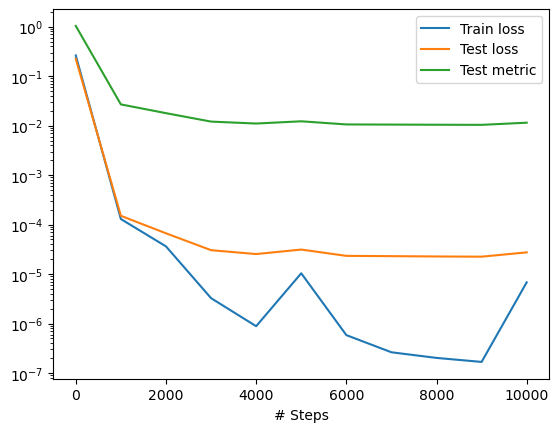

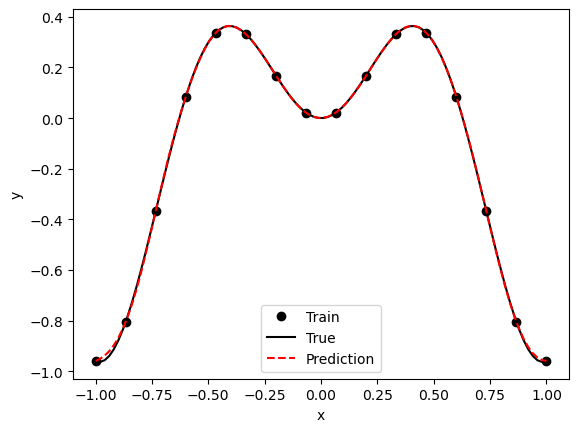

In [13]:
dde.saveplot(losshistory, train_state, issave=False, isplot=True)

# Learning a function from a dataset

In [14]:
!wget -N https://raw.githubusercontent.com/lululxvi/deepxde/master/examples/dataset/dataset.train
!wget -N https://raw.githubusercontent.com/lululxvi/deepxde/master/examples/dataset/dataset.test

--2023-05-05 18:04:30--  https://raw.githubusercontent.com/lululxvi/deepxde/master/examples/dataset/dataset.train
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13022 (13K) [text/plain]
Saving to: ‘dataset.train’

dataset.train       100%[===================>]  12.72K  --.-KB/s    in 0s      

Last-modified header missing -- time-stamps turned off.
2023-05-05 18:04:31 (184 MB/s) - ‘dataset.train’ saved [13022/13022]

--2023-05-05 18:04:31--  https://raw.githubusercontent.com/lululxvi/deepxde/master/examples/dataset/dataset.test
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP req

In [1]:
fname_train = 'dataset.train'
fname_test = 'dataset.test'

In [2]:
data = dde.data.DataSet(
    fname_train=fname_train,
    fname_test=fname_test,
    col_x=(0,),
    col_y=(1,),
    standardize=True,
)

NameError: name 'dde' is not defined

In [17]:
layer_size = [1] + [50]*3 + [1]
activation = 'tanh'
initializer = 'Glorot normal'
net = dde.nn.FNN(layer_size, activation, initializer)

In [18]:
model = dde.Model(data, net)
model.compile('adam', lr=0.001, metrics=['l2 relative error'])
losshistory, train_state = model.train(iterations=50000)

Compiling model...
'compile' took 0.000165 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [7.08e-01]    [7.27e-01]    [1.19e+00]    
1000      [8.49e-03]    [8.46e-03]    [1.29e-01]    
2000      [5.91e-03]    [6.30e-03]    [1.11e-01]    
3000      [5.30e-03]    [5.76e-03]    [1.06e-01]    
4000      [4.92e-03]    [5.40e-03]    [1.03e-01]    
5000      [4.79e-03]    [5.22e-03]    [1.01e-01]    
6000      [4.76e-03]    [5.11e-03]    [1.00e-01]    
7000      [4.75e-03]    [5.03e-03]    [9.93e-02]    
8000      [4.74e-03]    [4.97e-03]    [9.87e-02]    
9000      [4.73e-03]    [4.93e-03]    [9.83e-02]    
10000     [4.73e-03]    [4.90e-03]    [9.80e-02]    
11000     [4.72e-03]    [4.88e-03]    [9.78e-02]    
12000     [5.04e-03]    [5.09e-03]    [9.99e-02]    
13000     [4.71e-03]    [4.84e-03]    [9.74e-02]    
14000     [4.70e-03]    [4.82e-03]    [9.72e-02]    
15000     [4.69e-03]    [4.79e-03]    [9.69e-02]    
16000     [4.67e-03]    [4.76e-03]

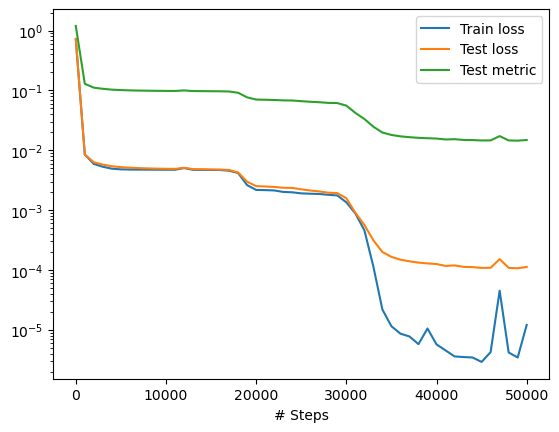

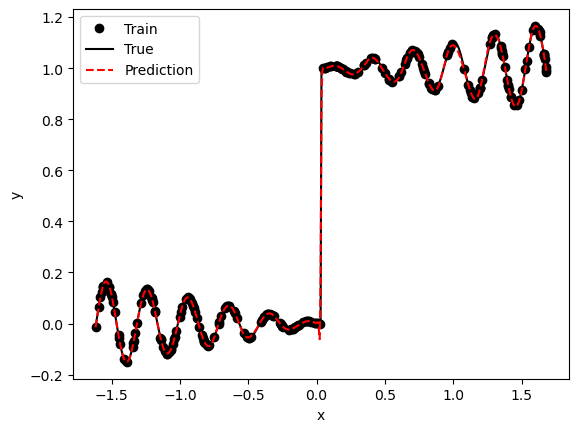

In [19]:
dde.saveplot(losshistory, train_state, issave=False, isplot=True)